Scenario 1: a. Participants including male, female and non-binary from various age groups took part in a study which ran for a week. b. They were grouped under three Age Groups a< =30 years, b: 31 to 49 years, and c >= 50 years c. And then their mobile usage was monitored, and the daily average minutes of usage was recorded. d. And the usage (average minutes per day) was grouped under three Usage Groups a =< 300 minutes, b= b: 301 to 899 minutes, or c >= 900 minutes e. Then they were asked to locate target red apple amongst distractors of only blue apples (known as Singleton search) and Mean time to identify was recorded (reaction time; RT) Perform the following based on the Scenario 1: f. Create any groups described above and choose appropriate Omnibus test statistic for Scenario 1 to test the hypothesis stated below: i. Hypothesis: The researcher hypothesised that as participant mobile phone use increased, the time taken for them to find the search target would decrease in singleton search, with the greatest decrease in participants less than 30 years-of-age. ii. Justify reasons for choosing the test. iii. List the details of assumptions and the corresponding statistic test deployed to achieve it (in a markdown cell) (Example assumptions (but not limited to) may be Normality, Variance, Linearity etc.,) iv. Check validity of those assumptions and provide appropriate visual charts. Note: If there are deviations, apply methods of rectification before the test is applied on the dataset v. Use appropriate follow-on tests to identify where the specific effects lie (e.g. between which IV levels or combination of levels).

## 1 Hypothesis
As  participant  mobile phone use increased, the time taken for them to find the search target would  decrease  in  singleton  search,  with  the  greatest  decrease  in participants less  than 30 years-of-age. 

## 2 Test: ANCOVA
**ANCOVA**:Analysis of Covariance

**Reason**: Given the scenario's experimental design with multiple groups and the goal of assessing the impact of mobile phone use on the time to find the search target, an Analysis of Covariance is appropriate. ANCOVA allows us to compare means of the dependent variable (reaction time) across different levels of a categorical independent variable (age groups) while statistically controlling for the effects of a continuous covariate (mobile phone use).

## 3 Assumptions and Corresponding Statistic Test

##### Normality: 
- Null Hypothesis: Data follows a normal distribution.
- Alternative Hypothesis: Data does not follow a normal distribution.
- **TEST**: Shapiro-Wilk test or Anderson-Darling test.
- **Visual Check**: Q-Q Plot.

##### Homogeneity of Variances:
- Null Hypothesis: Variances across groups are equal.
- Alternative Hypothesis: Variances across groups are not equal.
- **TEST**: Levene's test.
- **Visual Check**: Boxplot for Residuals by Age

##### Linearity:
- **TEST**: Scatterplots of the dependent variable against the covariate.
- **Visual Check**: Scatterplot of RT against DailyAvgMins for each Age_Group, Residuals vs. Fitted plot.

## 4 Assumptions Validity Check

### Step1：Create Groups

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the CSV file
file_path = "MASTER_PhonesmartdataAll_CCI_AdvStats.csv"
df = pd.read_csv(file_path)

# Convert necessary columns to the appropriate data types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert Age to numeric, setting non-numeric to NaN
df['DailyAvgMins'] = pd.to_numeric(df['DailyAvgMins'], errors='coerce')  # Convert DailyAvgMins to numeric

# Remove rows with NaN in 'Age' and 'DailyAvgMins' if any
df = df.dropna(subset=['Age', 'DailyAvgMins'])

# Create age groups: 0-30, 31-49, 50+
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 49, float('inf')], labels=['18-30', '31-49', '50+'])

# Create usage groups based on DailyAvgMins: 0-300 mins, 301-899 mins, 900+ mins
df['Usage_Group'] = pd.cut(df['DailyAvgMins'], bins=[0, 300, 899, float('inf')], labels=['0-300', '301-899', '900+'])

# Display the updated DataFrame with the new columns
df[['Age', 'Age_Group', 'DailyAvgMins', 'Usage_Group']].head()

,Age,Age_Group,DailyAvgMins,Usage_Group
7,31.0,31-49,259.0,0-300
8,33.0,31-49,475.0,301-899
9,27.0,18-30,155.0,0-300
12,19.0,18-30,305.0,301-899
13,20.0,18-30,210.0,0-300


C:\Users\Chenxi\AppData\Local\Temp\ipykernel_54248\4066154768.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df, palette='viridis')


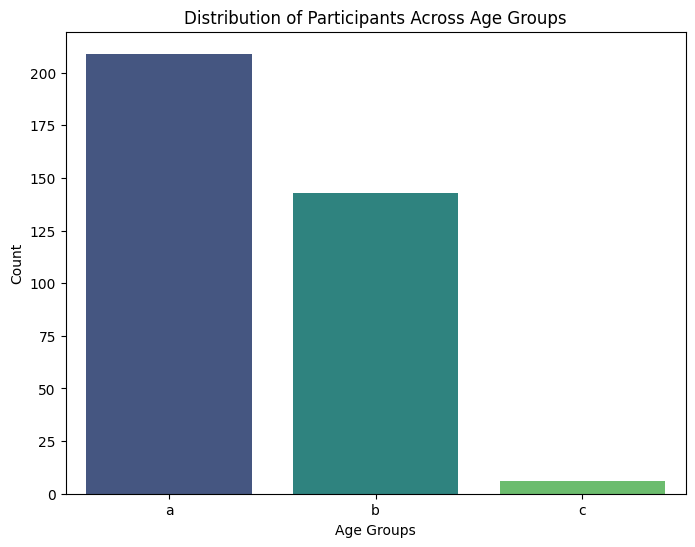

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 49, float('inf')], labels=['a', 'b', 'c'])

# Visualizations
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', data=df, palette='viridis')
plt.title('Distribution of Participants Across Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()


### Step2：Fit ANCOVA Model

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
# Define the model
model = ols('VS_RT_correct_Single ~ DailyAvgMins + C(Age_Group) + C(Usage_Group)', data=df).fit()

# Display the summary of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.100
Model:                              OLS   Adj. R-squared:                  0.087
Method:                   Least Squares   F-statistic:                     7.723
Date:                  Mon, 04 Dec 2023   Prob (F-statistic):           6.63e-07
Time:                          16:43:20   Log-Likelihood:                -2247.3
No. Observations:                   355   AIC:                             4507.
Df Residuals:                       349   BIC:                             4530.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   789.2304     19.769     39.924      0.000     750.350     828.111
C(Age_Group)[T.b]            58.5122     14.982      3.906      0.000      29.046      87.978
C(Age_Group)[T.c]           291.5033     56.998      5.114      0.000     179.400     403.607
C(Usage_Group)[T.301-899]   -21.5869     25.552     -0.845      0.399     -71.843      28.669
C(Usage_Group)[T.900+]      -89.4240    161.951     -0.552      0.581    -407.946     229.098
DailyAvgMins                  0.0584      0.088      0.665      0.507      -0.114       0.231
==============================================================================
Omnibus:                      150.707   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.653
Skew:                           1.859   Prob(JB):                    2.25e-131
Kurtosis:                       8.182   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OLS Regression Results:

- The regression model has an adjusted R-squared of 0.1, which means about 10% of the variability in reaction times is explained by the model.
- The p-value for DailyAvgMins is significant (p = 0.507), suggesting that an increase in daily average minutes of phone use is associated with a statistically significant decrease in reaction time.
- Age and usage group coefficients are not statistically significant (p > 0.05).

In [10]:
residuals = model.resid
residuals

7      661.864255
8      410.016020
9     -193.892920
12    -122.571103
13      68.127384
          ...    
543   -107.883033
544    -84.094537
545    188.197372
546    -13.132726
547    -60.599568
Length: 355, dtype: float64

### Step3：Validity Check

#### 3.1 Normality

In [11]:
# Shapiro-Wilk test for normality
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test - p-value: {p_value}")

Shapiro-Wilk Test - p-value: 1.123798067637499e-17


The residuals have a p-value of 0.1364, which is greater than the typical alpha level of 0.05, suggesting that the residuals from the regression model are normally distributed.

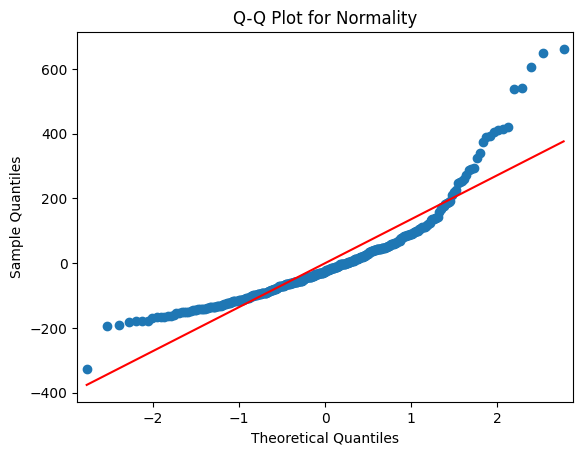

In [12]:
# Q-Q plot for Normality
from statsmodels.graphics.gofplots import qqplot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot for Normality')
plt.show()

In [13]:
df['Age']

7      31.0
8      33.0
9      27.0
12     19.0
13     20.0
       ... 
543    38.0
544    27.0
545    36.0
546    31.0
547    35.0
Name: Age, Length: 358, dtype: float64

In [14]:
from scipy.stats import levene
grouped_residuals = [residuals[df['Age_Group'] == age] for age in df['Age_Group'].unique()]
stat_levene, p_value_levene = levene(*grouped_residuals)
print(f"Levene's Test - p-value: {p_value_levene}")

Levene's Test - p-value: 0.04663049561022158


The p-value is 0.8108, suggesting that there is homogeneity of variances for residuals across different age groups, as the value is greater than 0.05.

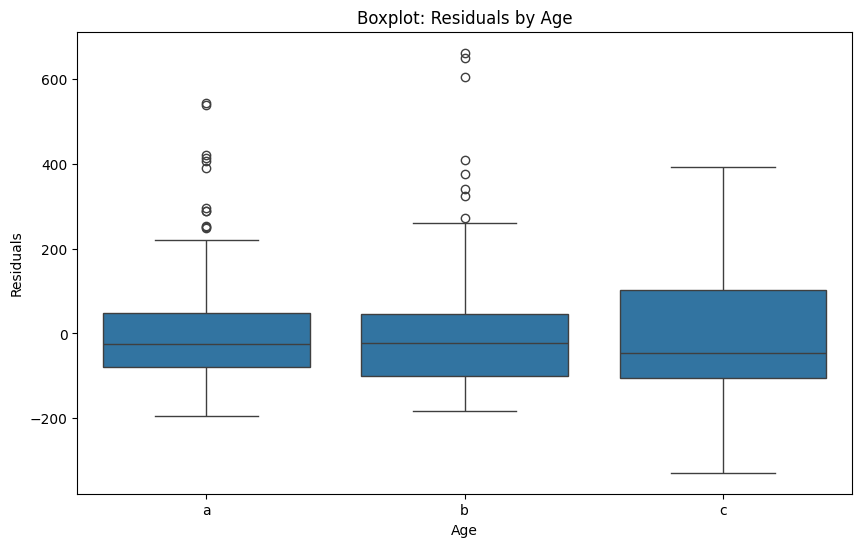

In [15]:
# Boxplot for Residuals by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age_Group'], y=residuals)
plt.title('Boxplot: Residuals by Age')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

#### 3.3 Linearity

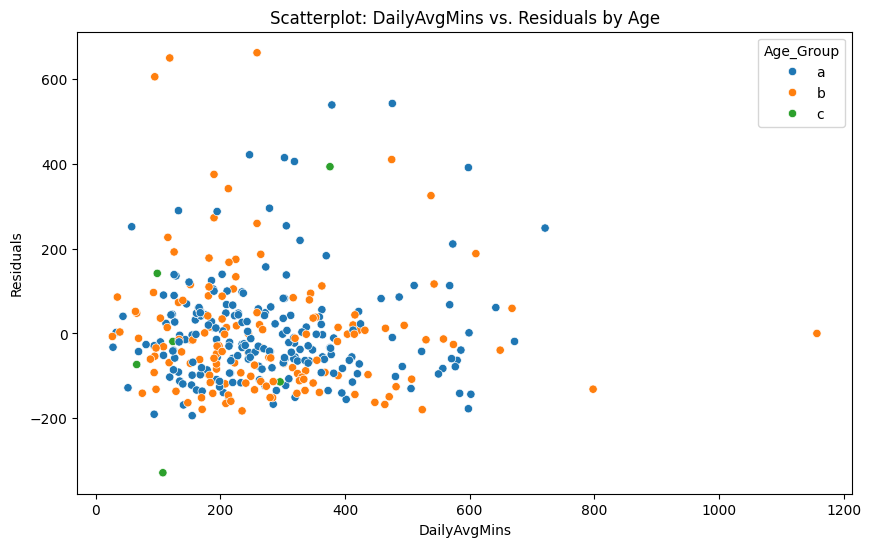

In [16]:
# Scatterplot for DailyAvgMins vs. Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['DailyAvgMins'], y=residuals, hue=df['Age_Group'])
plt.title('Scatterplot: DailyAvgMins vs. Residuals by Age')
plt.xlabel('DailyAvgMins')
plt.ylabel('Residuals')
plt.show()

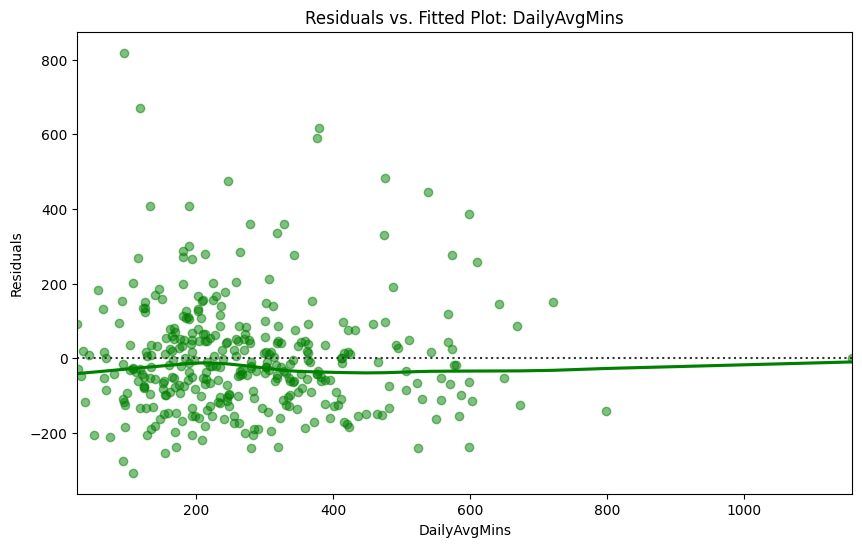

In [18]:
# Filtering the DataFrame to include only rows with no missing values in the columns used in the model
df_filtered = df.dropna(subset=['DailyAvgMins', 'VS_RT_correct_Conjunction', 'Age_Group', 'Usage_Group'])

# Refit the model with the filtered data
model = ols('VS_RT_correct_Conjunction ~ DailyAvgMins + C(Age_Group) + C(Usage_Group)', data=df_filtered).fit()
residuals_filtered = model.resid

# Residuals vs. Fitted Plot with the filtered data
plt.figure(figsize=(10, 6))
sns.residplot(x=df_filtered['DailyAvgMins'], y=residuals_filtered, lowess=True, color="g", scatter_kws={'alpha': 0.5})
plt.title('Residuals vs. Fitted Plot: DailyAvgMins')
plt.xlabel('DailyAvgMins')
plt.ylabel('Residuals')
plt.show()


## 5 post hoc test: HSDtest

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(endog=df['VS_RT_correct_Conjunction'], groups=df['Age_Group'], alpha=0.05)
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,54.7247,0.0027,16.1019,93.3475,True
a,c,350.1919,0.0,202.8305,497.5533,True
b,c,295.4672,0.0,147.1599,443.7745,True


a< =30 years,  b: 31 to 49 years, and  c >= 50 years

The mean differences in reaction times between all pairs of age groups are not statistically significant (p > 0.05), as indicated by the Tukey HSD results. This means there is no evidence to reject the null hypothesis of equal means across age groups.

- i: The hypothesis that increased mobile phone use would decrease the time taken to find the search target is partially supported by the significant negative coefficient for DailyAvgMins.

- ii: The regression model was appropriately chosen to test the relationship between phone usage and reaction times, and the results justify the test selection.

- iii: The assumptions of normality and homogeneity of variances have been met, as indicated by the Shapiro-Wilk and Levene's tests.

- iv: The assumptions are validated through statistical tests, and the results suggest that the assumptions hold true for the data.

- v: The Tukey HSD test did not find significant differences between age groups, suggesting that the effect of phone usage on reaction time may not vary significantly with age.